In [6]:
import pandas as pd

In [4]:
pd.__version__

'1.4.2'

## 文件的读取和写入
### 文件读取

In [5]:
df_csv = pd.read_csv("./data/my_csv.csv")

In [6]:
df_csv

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


In [7]:
df_txt = pd.read_table("./data/my_table.txt")

In [8]:
df_txt

,col1,col2,col3,col4
0,2,a,1.4,apple 2020/1/1
1,3,b,3.4,banana 2020/1/2
2,6,c,2.5,orange 2020/1/5
3,5,d,3.2,lemon 2020/1/7


In [10]:
df_excel = pd.read_excel("./data/my_excel.xlsx")

In [11]:
df_excel

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2
2,6,c,2.5,orange,2020/1/5
3,5,d,3.2,lemon,2020/1/7


常用的公共参数，`header=None`表示第一行不作为列名，`index_col`表示把某一列或几列作为索引，
`usecols`表示读取列的集合，默认读取所有的列，`parse_dates`表示需要转化为时间的列，`nrows`表示读取的数据行数。上面这些参数在上述的三个函数里都可以使用。

In [12]:
pd.read_table("./data/my_table.txt", header=None)
# 注意到第一行变了

,0,1,2,3
0,col1,col2,col3,col4
1,2,a,1.4,apple 2020/1/1
2,3,b,3.4,banana 2020/1/2
3,6,c,2.5,orange 2020/1/5
4,5,d,3.2,lemon 2020/1/7


In [13]:
pd.read_csv("./data/my_csv.csv", index_col=["col1","col2"])
# 注意到col1和col2被加粗了

,,col3,col4,col5
col1,col2,,,
2,a,1.4,apple,2020/1/1
3,b,3.4,banana,2020/1/2
6,c,2.5,orange,2020/1/5
5,d,3.2,lemon,2020/1/7


In [14]:
pd.read_excel("./data/my_excel.xlsx", usecols=["col1", "col2"])

,col1,col2
0,2,a
1,3,b
2,6,c
3,5,d


In [15]:
pd.read_csv("data/my_csv.csv", parse_dates=["col5"])
# 注意到第5列的时间格式变了

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020-01-01
1,3,b,3.4,banana,2020-01-02
2,6,c,2.5,orange,2020-01-05
3,5,d,3.2,lemon,2020-01-07


In [16]:
pd.read_excel("./data/my_excel.xlsx", nrows=2)

,col1,col2,col3,col4,col5
0,2,a,1.4,apple,2020/1/1
1,3,b,3.4,banana,2020/1/2


在读取`txt`文件时，经常遇到分隔符非空格的情况，`read_table`有一个分割参数`sep`，它使得用户可以自定义分割符号，进行`txt`数据的读取。例如，下面的读取的表以`||||`为分割：

In [17]:
pd.read_table("./data/my_table_special_sep.txt")

,col1 |||| col2
0,TS |||| This is an apple.
1,GQ |||| My name is Bob.
2,WT |||| Well done!
3,PT |||| May I help you?


上面的结果显然不是理想的，这时可以使用sep，同时需要指定引擎为python

In [18]:
pd.read_table("./data/my_table_special_sep.txt", sep="\|\|\|\|",engine="python")

,col1,col2
0,TS,This is an apple.
1,GQ,My name is Bob.
2,WT,Well done!
3,PT,May I help you?


在使用`read_table`的时候需要注意，参数`sep`中使用的是正则表达式，因此需要对`|`进行转义变成`\|`，否则无法读取到正确的结果。

### 数据写入

一般在数据写入中，最常用的操作是把index设置为False，特别当索引没有特殊意义的时候，这样的行为能把索引在保存的时候去除。

In [22]:
# 准备欲保存的数据
pd_csv = pd.read_csv("./data/my_csv.csv")
pd_excel = pd.read_excel("./data/my_excel.xlsx")
pd_txt = pd.read_table("./data/my_table.txt")

In [21]:
# 保存数据
df_csv.to_csv("./data/my_csv_saved.csv", index=False)
df_excel.to_excel("./data/my_excel_saved.xlsx", index=False)

pandas中没有定义to_table函数，但是to_csv可以保存为txt文件，并且允许自定义分隔符，常用制表符\t分割：

In [23]:
df_txt.to_csv("./data/my_table_saved.txt", index=False, sep="\t")

如果想要把表格快速转换为markdown和latex语言，可以使用to_markdown和to_latex函数，此处需要安装tabulate包。

In [26]:
print(df_csv.to_markdown())

|    |   col1 | col2   |   col3 | col4   | col5     |
|---:|-------:|:-------|-------:|:-------|:---------|
|  0 |      2 | a      |    1.4 | apple  | 2020/1/1 |
|  1 |      3 | b      |    3.4 | banana | 2020/1/2 |
|  2 |      6 | c      |    2.5 | orange | 2020/1/5 |
|  3 |      5 | d      |    3.2 | lemon  | 2020/1/7 |


In [27]:
print(df_csv.to_latex())

\begin{tabular}{lrlrll}
\toprule
{} &  col1 & col2 &  col3 &    col4 &      col5 \\
\midrule
0 &     2 &    a &   1.4 &   apple &  2020/1/1 \\
1 &     3 &    b &   3.4 &  banana &  2020/1/2 \\
2 &     6 &    c &   2.5 &  orange &  2020/1/5 \\
3 &     5 &    d &   3.2 &   lemon &  2020/1/7 \\
\bottomrule
\end{tabular}



C:\Users\17761\AppData\Local\Temp\ipykernel_20600\2725033129.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_csv.to_latex())


## 基本数据结构
`pandas`中具有两种基本的数据存储结构，存储一维`values`的`Series`和存储二维`values`的`DataFrame`，在这两种结构上定义了很多的属性和方法。

### Series
`Series`一般由四个部分组成，分别是序列的值`data`、索引`index`、存储类型`dtype`、序列的名字`name`。其中，索引也可以指定它的名字，默认为空。

In [28]:
s = pd.Series(data = [100, 'a', {'dic1':5}],
              index = pd.Index(['id1', 20, 'third']), 
              name="my_idx")

In [44]:
# 可以看到index是行索引
s

id1              100
20                 a
third    {'dic1': 5}
Name: my_idx, dtype: object

`object`代表了一种混合类型，正如上面的例子中存储了整数、字符串以及`Python`的字典数据结构。此外，目前`pandas`把纯字符串序列也默认认为是一种`object`类型的序列，但它也可以用`string`类型存储

获取上述属性

In [31]:
s.values

array([100, 'a', {'dic1': 5}], dtype=object)

In [33]:
s.index

Index(['id1', 20, 'third'], dtype='object')

如果想要取出单个索引对应的值，可以通过[index_item]可以取出

In [42]:
s.index[0],s.index[1],s.index[2]

('id1', 20, 'third')

In [35]:
s.dtype

dtype('O')

In [37]:
s.name

'my_idx'

利用.shape可以获取序列的长度

In [43]:
s.shape

(3,)

### DataFrame
`DataFrame`在`Series`的基础上增加了**列索引**

一个数据框可以由二维的`data`与行列索引来构造

In [45]:
# data shape(3,4)--(列,行)
data = [[1, 'a', 1.2], [2, 'b', 2.2], [3, 'c', 3.2],[4, 'd', 4.2]]
df = pd.DataFrame(data=data, 
                  index=["row_%d"%i for i in range(4)], 
                  columns=['col_0', 'col_1', 'col_2'])

In [46]:
df

,col_0,col_1,col_2
row_0,1,a,1.2
row_1,2,b,2.2
row_2,3,c,3.2
row_3,4,d,4.2


但一般而言，更多的时候会采用从列索引名到数据的映射来构造数据框，同时再加上行索引

In [47]:
data = {'col_0':[1,2,3], 'col_1':list("abc"), 'col_2':[1.2,2.2,3.2], "col_3":list("ABC")}
df = pd.DataFrame(data=data, index=["row_%d"%i for i in range(3)])

In [48]:
df

,col_0,col_1,col_2,col_3
row_0,1,a,1.2,A
row_1,2,b,2.2,B
row_2,3,c,3.2,C


由于这种映射关系，在DataFrame中可以用[col_name]与[col_list]来取出相应的列与由多个列组成的表，结果分别为Series和DataFrame

In [50]:
# 根据列名取出第一列-传入col_name
df["col_0"]

row_0    1
row_1    2
row_2    3
Name: col_0, dtype: int64

In [52]:
# 根据列名取出第一列和第三列-传入col_list
df[["col_0", "col_2"]]

,col_0,col_2
row_0,1,1.2
row_1,2,2.2
row_2,3,3.2


获取属性

In [53]:
data = {'col_0':[1,2,3], 'col_1':list("abc"), 'col_2':[1.2,2.2,3.2], "col_3":list("ABC")}
df = pd.DataFrame(data=data, index=["row_%d"%i for i in range(3)])

In [55]:
df.values

array([[1, 'a', 1.2, 'A'],
       [2, 'b', 2.2, 'B'],
       [3, 'c', 3.2, 'C']], dtype=object)

In [57]:
# 取行索引
df.index

Index(['row_0', 'row_1', 'row_2'], dtype='object')

In [59]:
# 取列索引
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3'], dtype='object')

In [61]:
df.dtypes# 返回的是值为相应列数据类型的Series

col_0      int64
col_1     object
col_2    float64
col_3     object
dtype: object

In [ ]:
df.shape

## 索引

### 列索引

一般通过`[]`来实现。通过`[列名]`可以从`DataFrame`中取出相应的列，返回值为`Series`

In [3]:

df = pd.read_csv("./data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
# 通过[列名]取出"Name"这一列
df["Name"].head()

0      Gaopeng Yang
1    Changqiang You
2           Mei Sun
3      Xiaojuan Sun
4       Gaojuan You
Name: Name, dtype: object

若要取出单列，且列名中不包含空格，则可以用`.列名`取出，这和`[列名]`是等价的

In [6]:
df.Name.head()

0      Gaopeng Yang
1    Changqiang You
2           Mei Sun
3      Xiaojuan Sun
4       Gaojuan You
Name: Name, dtype: object

要取出多个列，则可以通过`[列名组成的列表]`，其返回值为一个`DataFrame`

In [4]:
df[['Gender', 'Name']].head()

,Gender,Name
0,Female,Gaopeng Yang
1,Male,Changqiang You
2,Male,Mei Sun
3,Female,Xiaojuan Sun
4,Male,Gaojuan You


### 行索引

#### 行索引是字符串的Series(或Dataframe的一列)

如果取出单个索引的对应元素，则可以使用`[item]`，若`Series`只有单个值对应，则返回这个标量值，如果有多个值对应，则返回一个`Series`

In [7]:
# 通过index设置了行索引，且行索引是字符串并存在多个同名索引
s = pd.Series([1, 2, 3, 4, 5, 6], index=['a', 'b', 'a', 'a', 'a', 'c'])
s

a    1
b    2
a    3
a    4
a    5
c    6
dtype: int64

In [8]:
# 存在多个同名索引a，所以返回Series
s["a"]

a    1
a    3
a    4
a    5
dtype: int64

In [9]:
# 只有单个值对应，返回标量
s["b"]

2

取出多个索引的对应元素，则可以使用`[items的列表]`

In [10]:
s[["c", "b"]]

c    6
b    2
dtype: int64

如果想要取出某两个索引之间的元素，并且这两个索引是在整个索引中唯一出现，则可以使用切片,，同时需要注意这里的切片会包含两个端点

In [14]:
print(s)
print(s["c":"b":-2])# 从后往前跳步2来取元素

a    1
b    2
a    3
a    4
a    5
c    6
dtype: int64
c    6
a    4
b    2
dtype: int64


前后端点的值重复出现，那么需要经过排序才能使用切片，否则报错

In [15]:
try:
    s["a":"b"]
except Exception as e:
    print(e)

"Cannot get left slice bound for non-unique label: 'a'"


In [17]:
# 经过排序才能使用切片
sorted_s = s.sort_index()
sorted_s["a":"b"]

a    1
a    3
a    4
a    5
b    2
dtype: int64

#### 索引是整数的`Series`(或Dataframe的一列)

在使用数据的读入函数时，如果不特别指定所对应的列作为索引，那么会生成从0开始的整数索引作为默认索引。

In [24]:
# 不特别指定所对应的列作为索引,生成默认索引
s = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'])
s

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

In [25]:
# 使用行索引获取值
s[1]

'b'

In [27]:
# 特别指定所对应的列作为索引,任意一组符合长度要求的整数都可以作为索引
s = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'], index=[1, 3, 1, 2, 5, 4])
s

1    a
3    b
1    c
2    d
5    e
4    f
dtype: object

In [28]:
s[1]

1    a
1    c
dtype: object

In [29]:
# 使用列表同时取多个索引值
s[[2,3]]

2    d
3    b
dtype: object

使用整数切片(不包含右端点),切片对应的是存储位置而不是索引号

In [30]:
s[1:-1:2]

3    b
2    d
dtype: object

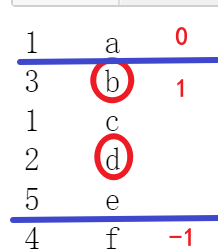

**`如果不想陷入麻烦，那么请不要把纯浮点以及任何混合类型（字符串、整数、浮点类型等的混合）作为索引，否则可能会在具体的操作时报错或者返回非预期的结果，并且在实际的数据分析中也不存在这样做的动机。`**

### loc索引器

`loc`索引器的一般形式是`loc[*, *]`，其中第一个`*`代表行的选择，第二个`*`代表列的选择，如果省略第二个位置写作`loc[*]`，这个`*`是指行的筛选。其中，`*`的位置一共有五类合法对象，分别是：单个元素、元素列表、元素切片、布尔列表以及函数。

对于Series也可以使用loc索引，其遵循的原则与DataFrame中用于行筛选的loc[*]完全一致

In [36]:
df = pd.read_csv("./data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
# 此时仍使用的是默认行索引
df.head()

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


#### loc取索引对应值的某一行

In [73]:
# 先利用set_index方法把Name列设为索引
df_demo = df.set_index("Name")
# 此时默认行索引没了
df_demo.head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N


In [74]:
# 使用loc取索引对应值的某一行,如果该元素在索引中重复则结果为DataFrame,否则为Series
df_demo.loc["Mei Sun"]  # 注意Name是索引

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Mei Sun,Shanghai Jiao Tong University,Junior,Female,50.0,N


In [40]:
# 名字唯一,为Series
df_demo.loc["Quan Zhao"]

School      Shanghai Jiao Tong University
Grade                              Junior
Gender                             Female
Weight                               53.0
Transfer                                N
Name: Quan Zhao, dtype: object

#### 进一步使用loc取列

In [41]:
# 进一步使用loc取列
df_demo.loc["Mei Sun", "School"]

Name
Mei Sun    Shanghai Jiao Tong University
Mei Sun    Shanghai Jiao Tong University
Name: School, dtype: object

In [75]:
df_demo.loc["Quan Zhao", "School"]

'Shanghai Jiao Tong University'

#### loc中传入列表

In [45]:
# loc中传入列表
df_demo.loc[["Quan Zhao", "Mei Sun"],["Grade", "School"]]

,Grade,School
Name,,
Quan Zhao,Junior,Shanghai Jiao Tong University
Mei Sun,Senior,Shanghai Jiao Tong University
Mei Sun,Junior,Shanghai Jiao Tong University


#### loc传元素切片

如果是唯一值的起点和终点字符，那么就可以使用切片，并且包含两个端点，如果不唯一则报错

In [48]:
# loc传元素切片
df_demo.loc["Gaopeng Yang":"Gaojuan You"]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N


In [49]:
# loc传元素切片
df_demo.loc["Gaopeng Yang":"Gaojuan You", "Grade":"Weight"]

,Grade,Gender,Weight
Name,,,
Gaopeng Yang,Freshman,Female,46.0
Changqiang You,Freshman,Male,70.0
Mei Sun,Senior,Male,89.0
Xiaojuan Sun,Sophomore,Female,41.0
Gaojuan You,Sophomore,Male,74.0


上述是整数索引时也成立

In [51]:
# 索引是之前设置的Name
df_demo.index
# 修改索引为整数索引
df_demo.index = range(df_demo.shape[0], 0, -1)
df_demo.index

RangeIndex(start=200, stop=0, step=-1)

In [52]:
# 索引变化了，没有"Name"这一列了
df_demo.head()

,School,Grade,Gender,Weight,Transfer
200,Shanghai Jiao Tong University,Freshman,Female,46.0,N
199,Peking University,Freshman,Male,70.0,N
198,Shanghai Jiao Tong University,Senior,Male,89.0,N
197,Fudan University,Sophomore,Female,41.0,N
196,Fudan University,Sophomore,Male,74.0,N


In [53]:
# 使用loc切片——可见切片的值与索引的值对应
df_demo.loc[5:3]

,School,Grade,Gender,Weight,Transfer
5,Fudan University,Junior,Female,46.0,N
4,Tsinghua University,Senior,Female,50.0,N
3,Shanghai Jiao Tong University,Senior,Female,45.0,N


In [55]:
df_demo.loc[3:5]# 没有返回，说明不是整数位置切片

,School,Grade,Gender,Weight,Transfer


#### 传入布尔值进行索引

此处传入`loc`的布尔列表与`DataFrame`长度相同，且列表为`True`的位置所对应的行会被选中，`False`则会被剔除。


In [59]:
df_demo.loc[df_demo.Weight>80]

,School,Grade,Gender,Weight,Transfer
198,Shanghai Jiao Tong University,Senior,Male,89.0,N
177,Shanghai Jiao Tong University,Senior,Male,87.0,N
162,Peking University,Freshman,Male,87.0,N
134,Fudan University,Senior,Male,81.0,N
129,Shanghai Jiao Tong University,Sophomore,Male,82.0,N
101,Peking University,Freshman,Male,83.0,N
83,Shanghai Jiao Tong University,Freshman,Male,83.0,N
66,Shanghai Jiao Tong University,Senior,Male,83.0,N


前面所提到的传入元素列表，也可以通过`isin`方法返回的布尔列表等价写出

In [60]:
df_demo.Grade.isin(['Freshman', 'Senior']).head()

200     True
199     True
198     True
197    False
196    False
Name: Grade, dtype: bool

In [63]:
df_demo.loc[df_demo.Grade.isin(['Freshman', 'Senior'])].head()

,School,Grade,Gender,Weight,Transfer
200,Shanghai Jiao Tong University,Freshman,Female,46.0,N
199,Peking University,Freshman,Male,70.0,N
198,Shanghai Jiao Tong University,Senior,Male,89.0,N
195,Tsinghua University,Freshman,Female,51.0,N
194,Shanghai Jiao Tong University,Freshman,Female,52.0,N


用`|（或）, &（且）, ~（取反）`的组合来实现复合条件

In [67]:
df_demo[(df_demo.School == "Peking University") & (df_demo.Grade == "Freshman")]

,School,Grade,Gender,Weight,Transfer
199,Peking University,Freshman,Male,70.0,N
168,Peking University,Freshman,Female,48.0,N
165,Peking University,Freshman,Male,78.0,N
164,Peking University,Freshman,Male,79.0,Y
162,Peking University,Freshman,Male,87.0,N
155,Peking University,Freshman,Female,43.0,N
146,Peking University,Freshman,Male,58.0,Y
143,Peking University,Freshman,Female,45.0,N
112,Peking University,Freshman,Female,53.0,N
104,Peking University,Freshman,Female,56.0,N


#### 传入函数

函数的输入值为DataFrame本身

返回值

In [68]:
def cond(x):
    condition1 = x.School == "Peking University"
    condition2 = x.Grade == "Freshman"
    res = condition1 & condition2
    return res
# 函数的形式参数x本质上即为df_demo
df_demo.loc[cond]

,School,Grade,Gender,Weight,Transfer
199,Peking University,Freshman,Male,70.0,N
168,Peking University,Freshman,Female,48.0,N
165,Peking University,Freshman,Male,78.0,N
164,Peking University,Freshman,Male,79.0,Y
162,Peking University,Freshman,Male,87.0,N
155,Peking University,Freshman,Female,43.0,N
146,Peking University,Freshman,Male,58.0,Y
143,Peking University,Freshman,Female,45.0,N
112,Peking University,Freshman,Female,53.0,N
104,Peking University,Freshman,Female,56.0,N


之前取行列的方法也可以通过函数实现

In [76]:
df = pd.read_csv("./data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
# 此时仍使用的是默认行索引
df.head()

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


In [77]:
df_demo.loc["Quan Zhao","Gender"]

'Female'

In [78]:
df_demo.loc[lambda x : "Quan Zhao", lambda x : "Gender"]

'Female'

实现之前的切片由于函数无法返回如start: end: step的切片形式，故返回切片时要用slice对象进行包装

In [79]:
# loc传元素切片
df_demo.loc["Gaopeng Yang":"Gaojuan You", "Grade":"Weight"]

,Grade,Gender,Weight
Name,,,
Gaopeng Yang,Freshman,Female,46.0
Changqiang You,Freshman,Male,70.0
Mei Sun,Senior,Male,89.0
Xiaojuan Sun,Sophomore,Female,41.0
Gaojuan You,Sophomore,Male,74.0


In [80]:
df_demo.loc[lambda x:slice("Gaopeng Yang","Gaojuan You"), lambda x:slice( "Grade","Weight")]

,Grade,Gender,Weight
Name,,,
Gaopeng Yang,Freshman,Female,46.0
Changqiang You,Freshman,Male,70.0
Mei Sun,Senior,Male,89.0
Xiaojuan Sun,Sophomore,Female,41.0
Gaojuan You,Sophomore,Male,74.0


In [7]:
df_chain = pd.DataFrame([[0,0],[1,0],[-1,0]], columns=list('AB'))

In [3]:
df_chain

,A,B
0,0,0
1,1,0
2,-1,0


In [8]:
# 使用方括号列索引
df_chain.A!=0

0    False
1     True
2     True
Name: A, dtype: bool


在对表或者序列赋值时，应当在使用一层索引器后直接进行赋值操作，这样做是由于进行多次索引后赋值是赋在临时返回的`copy`副本上的，而没有真正修改元素从而报出`SettingWithCopyWarning`警告。

In [10]:
# 链式赋值：使用方括号列索引后，再使用点的列索引
df_chain[df_chain.A!=0].B = 1

C:\Users\17761\AppData\Local\Temp\ipykernel_18196\3215211827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chain[df_chain.A!=0].B = 1


In [11]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("error")
    try:
        df_chain[df_chain.A!=0].B = 999
    except Warning as w:
        print(w)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
# 正确的做法：取对应的行和列
df_chain.loc[df_chain.A != 0, "B"] = 111
df_chain

,A,B
0,0,0
1,1,111
2,-1,111


### iloc索引器

`iloc`的使用与`loc`完全类似，只不过是针对位置进行筛选，在相应的`*`位置处一共也有五类合法对象，分别是：整数、整数列表、整数切片、布尔列表以及函数，函数的返回值必须是前面的四类合法对象中的一个

In [14]:
df = pd.read_csv("./data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
# 此时仍使用的是默认行索引
df.head()

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


#### Series : 通过iloc返回相应位置的值或子序列

In [35]:
se = df.School
se

0      Shanghai Jiao Tong University
1                  Peking University
2      Shanghai Jiao Tong University
3                   Fudan University
4                   Fudan University
                   ...              
195                 Fudan University
196              Tsinghua University
197    Shanghai Jiao Tong University
198    Shanghai Jiao Tong University
199              Tsinghua University
Name: School, Length: 200, dtype: object

In [36]:
se.iloc[1]

'Peking University'

In [37]:
se.iloc[1:5:2]

1    Peking University
3     Fudan University
Name: School, dtype: object

#### DataFrame:输入同样也为`DataFrame`本身。

In [15]:
df.iloc[1,1]# 第二行第二列

'Freshman'

In [16]:
df.iloc[[0,1], [0,1]]# 前两行前两列

,School,Grade
0,Shanghai Jiao Tong University,Freshman
1,Peking University,Freshman


In [17]:
df.iloc[1:4, 2:4]# 切片不包含结束端点

,Name,Gender
1,Changqiang You,Male
2,Mei Sun,Male
3,Xiaojuan Sun,Female


In [19]:
df[lambda x : slice(1,4)]

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N


使用布尔索引

**在使用布尔列表的时候要特别注意，不能传入Series而必须传入序列的values，否则会报错。**

In [23]:
df_demo = df.head()
df_demo

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


In [27]:
res = df_demo.Weight > 80
res

0    False
1    False
2     True
3    False
4    False
Name: Weight, dtype: bool

In [28]:
type(res)

pandas.core.series.Series

In [32]:
# 在使用布尔列表的时候要特别注意，不能传入Series否则会报错。
try:
    df_demo.iloc[res]
except Exception as e:
    print(e)

iLocation based boolean indexing on an integer type is not available


In [29]:
result = (df_demo.Weight > 80).values

In [30]:
type(result)

numpy.ndarray

In [33]:
# 必须传入序列的values
df_demo.iloc[result]

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N


**因此，在使用布尔筛选的时候还是应当优先考虑loc的方式**

## DataFrame操作

## 随机抽样

如果把`DataFrame`的每一行看作一个样本，或把每一列看作一个特征，再把整个`DataFrame`看作总体，想要对样本或特征进行随机抽样就可以用`sample`函数

`sample`函数中的主要参数为:
`n`(抽样数量), 

`axis`(抽样的方向（0为行、1为列）), 

`frac`(抽样比例（0.3则为从总体中抽出30%的样本）),

`replace`,是否放回,当 replace = True,每个样本的抽样相对概率则表示有放回抽样

`weights`,每个样本的抽样相对概率

In [38]:
df_sample = pd.DataFrame({"id": list("abcde"), "value":[1, 2, 3, 4, 90]})
df_sample

,id,value
0,a,1
1,b,2
2,c,3
3,d,4
4,e,90


In [39]:
# 抽样数量为3
df_sample.sample(3, replace=True, weights=df_sample.value)

,id,value
4,e,90
4,e,90
0,a,1


**转置**

In [65]:
data = {'col_0':[1,2,3], 'col_1':list("abc"), 'col_2':[1.2,2.2,3.2], "col_3":list("ABC")}
df = pd.DataFrame(data=data, index=["row_%d"%i for i in range(3)])
df.shape

(3, 4)

In [69]:
transpose_df = df.T
transpose_df

,row_0,row_1,row_2
col_0,1,2,3
col_1,a,b,c
col_2,1.2,2.2,3.2
col_3,A,B,C


In [71]:
transpose_df.shape

(4, 3)

## 汇总函数

In [72]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")

In [74]:
# 查看列索引
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer',
       'Test_Number', 'Test_Date', 'Time_Record'],
      dtype='object')

上述列名依次代表学校、年级、姓名、性别、身高、体重、是否为转系生、体测场次、测试时间、1000米成绩，本章只需使用其中的前七列

In [76]:
df = df[df.columns[:7]]

head, tail函数分别表示返回表或者序列的前n行和后n行，其中n默认为5：

In [78]:
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N


In [80]:
df.tail(3)

,School,Grade,Name,Gender,Height,Weight,Transfer
197,Shanghai Jiao Tong University,Senior,Chengqiang Chu,Female,153.9,45.0,N
198,Shanghai Jiao Tong University,Senior,Chengmei Shen,Male,175.3,71.0,N
199,Tsinghua University,Sophomore,Chunpeng Lv,Male,155.7,51.0,N


info, describe分别返回表的信息概况和表中数值列对应的主要统计量

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   School    200 non-null    object 
 1   Grade     200 non-null    object 
 2   Name      200 non-null    object 
 3   Gender    200 non-null    object 
 4   Height    183 non-null    float64
 5   Weight    189 non-null    float64
 6   Transfer  188 non-null    object 
dtypes: float64(2), object(5)
memory usage: 11.1+ KB


In [83]:
df.describe()

,Height,Weight
count,183.000000,189.000000
mean,163.218033,55.015873
std,8.608879,12.824294
min,145.400000,34.000000
25%,157.150000,46.000000
50%,161.900000,51.000000
75%,167.500000,65.000000
max,193.900000,89.000000


`info, describe`只能实现较少信息的展示，如果想要对一份数据集进行全面且有效的观察，特别是在列较多的情况下，推荐使用[pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/)包

## 特征统计函数(聚合函数)

聚合函数-操作后返回的是标量

In [84]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")
# 只使用前7列
df = df[df.columns[:7]]


In [85]:
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

选出身高和体重列

In [86]:
df_demo = df[["Height", "Weight"]]

In [88]:
df_demo

,Height,Weight
0,158.9,46.0
1,166.5,70.0
2,188.9,89.0
3,NaN,41.0
4,174.0,74.0
...,...,...
195,153.9,46.0
196,160.9,50.0
197,153.9,45.0
198,175.3,71.0


In [91]:
df_demo.mean(), df_demo.max()

(Height    163.218033
 Weight     55.015873
 dtype: float64,
 Height    193.9
 Weight     89.0
 dtype: float64)

`quantile, count, idxmax`这三个函数，它们分别返回的是分位数、非缺失值个数、最大值对应的索引：

In [93]:
df_demo.quantile(0.75)

Height    167.5
Weight     65.0
Name: 0.75, dtype: float64

In [95]:
df_demo.count()

Height    183
Weight    189
dtype: int64

In [97]:
df_demo.idxmax()

Height    193
Weight      2
dtype: int64

指定公告参数axis对不同轴进行聚合:默认为0代表逐列聚合，如果设置为1则表示逐行聚合

In [100]:
df_demo.mean(axis=0)

Height    163.218033
Weight     55.015873
dtype: float64

## 常用函数

### 唯一值函数
对序列使用`unique`和`nunique`可以分别得到其唯一值组成的列表和唯一值的个数

In [101]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")
# 只使用前7列
df = df[df.columns[:7]]

In [102]:
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

In [104]:
df["School"].unique()

array(['Shanghai Jiao Tong University', 'Peking University',
       'Fudan University', 'Tsinghua University'], dtype=object)

In [105]:
df["School"].nunique()

4

`value_counts`可以得到唯一值和其对应出现的频数：

In [107]:
df["School"].value_counts()

Tsinghua University              69
Shanghai Jiao Tong University    57
Fudan University                 40
Peking University                34
Name: School, dtype: int64

如果想要观察<span class="mark">多个列组合</span>的唯一值，可以使用`drop_duplicates`。其中的关键参数是`keep`，默认值`first`表示每个组合保留第一次出现的所在行，`last`表示保留最后一次出现的所在行，`False`表示把所有重复组合所在的行剔除。

In [111]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [112]:
df["Transfer"].unique()

array(['N', nan, 'Y'], dtype=object)

In [113]:
df["Name"].unique()

array(['Gaopeng Yang', 'Changqiang You', 'Mei Sun', 'Xiaojuan Sun',
       'Gaojuan You', 'Xiaoli Qian', 'Qiang Chu', 'Gaoqiang Qian',
       'Changli Zhang', 'Juan Xu', 'Xiaopeng Zhou', 'Xiaoquan Lv',
       'Peng You', 'Yanfeng Qian', 'Xiaomei Zhou', 'Changqiang Yang',
       'Xiaoqiang Qin', 'Peng Wang', 'Xiaofeng Sun', 'Changjuan You',
       'Xiaopeng Shen', 'Changqiang Sun', 'Qiang Zheng', 'Chunmei You',
       'Xiaopeng Chu', 'Yanli You', 'Qiang Sun', 'Gaoqiang Qin',
       'Changmei Xu', 'Changli Lv', 'Feng Zheng', 'Gaopeng Shi',
       'Yanjuan Han', 'Li Wu', 'Gaoli Zhao', 'Xiaojuan Qin',
       'Xiaoquan Zhang', 'Qiang Han', 'Chengpeng Zheng', 'Li Wang',
       'Chunqiang Chu', 'Mei Zhang', 'Gaoli Feng', 'Yanqiang Feng',
       'Quan Chu', 'Feng Zhou', 'Peng Wu', 'Mei Xu', 'Gaomei Lv',
       'Xiaoli Wang', 'Chengquan Chu', 'Chunli Lv', 'Chengli You',
       'Xiaojuan Chu', 'Chengquan Zhang', 'Qiang Lv', 'Changquan Chu',
       'Gaoli Xu', 'Yanpeng Lv', 'Xiaopeng Qin', 'Xiaol

In [118]:
# keep，默认值first表示每个组合保留第一次出现的所在行
df_demo = df[['Gender','Transfer','Name']]
df_demo.drop_duplicates(['Name', 'Gender'])

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
3,Female,N,Xiaojuan Sun
4,Male,N,Gaojuan You
...,...,...,...
194,Female,NaN,Yanmei Qian
196,Female,N,Li Zhao
197,Female,N,Chengqiang Chu
198,Male,N,Chengmei Shen


In [117]:
# last表示保留最后一次出现的所在行
df_demo.drop_duplicates(['Name', 'Gender'], keep="last")

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
4,Male,N,Gaojuan You
5,Female,N,Xiaoli Qian
...,...,...,...
195,Female,N,Xiaojuan Sun
196,Female,N,Li Zhao
197,Female,N,Chengqiang Chu
198,Male,N,Chengmei Shen


In [116]:
# False表示把所有重复组合所在的行剔除
df_demo.drop_duplicates(['Name', 'Gender'], keep=False)

,Gender,Transfer,Name
0,Female,N,Gaopeng Yang
1,Male,N,Changqiang You
2,Male,N,Mei Sun
4,Male,N,Gaojuan You
5,Female,N,Xiaoli Qian
...,...,...,...
194,Female,NaN,Yanmei Qian
196,Female,N,Li Zhao
197,Female,N,Chengqiang Chu
198,Male,N,Chengmei Shen


In [120]:
# 在Series上也可以使用
df["School"].drop_duplicates()

0    Shanghai Jiao Tong University
1                Peking University
3                 Fudan University
5              Tsinghua University
Name: School, dtype: object

此外，`duplicated`和`drop_duplicates`的功能类似，但前者返回了是否为唯一值的布尔列表，其`keep`参数与后者一致。其返回的序列，把重复元素设为`True`，否则为`False`。 `drop_duplicates`等价于把`duplicated`为`True`的对应行剔除。

In [122]:
df_demo.duplicated(['Name', 'Gender'])# 为True的是Name和Gender都一样的重复行


0      False
1      False
2      False
3      False
4      False
       ...  
195     True
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [123]:
# 在Series上也可以使用
df["School"].duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
195     True
196     True
197     True
198     True
199     True
Name: School, Length: 200, dtype: bool

### 替换函数

映射替换（`replace`方法、`str.replace`方法`cat.codes`方法）、逻辑替换、数值替换

替换操作是针对某一个列进行的，因此下面的例子都以`Series`举例


#### 映射替换

In [124]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")
# 只使用前7列
df = df[df.columns[:7]]


In [126]:
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

**replace**

在replace中，可以通过字典构造，或者传入两个列表来进行替换

In [127]:
# 通过字典构造
df["Gender"].replace({"Female":0, "Male":1}).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [129]:
# 传入两个列表
df["Gender"].replace(["Female", "Male"],[0,1]).head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

方向替换，指定method参数为ffill则为用前面一个最近的未被替换的值进行替换，bfill则使用后面最近的未被替换的值进行替换。

In [136]:
s = pd.Series(['a', 1, 'b', 2, 1, 1, 'a'])
s


0    a
1    1
2    b
3    2
4    1
5    1
6    a
dtype: object

In [138]:
s.replace([1,2], method="ffill")

0    a
1    a
2    b
3    b
4    b
5    b
6    a
dtype: object

In [139]:
s.replace([1,2], method="bfill")

0    a
1    b
2    b
3    a
4    a
5    a
6    a
dtype: object

**正则替换请使用`str.replace`**

虽然对于`replace`而言可以使用正则替换，但是当前版本下对于`string`类型的正则替换还存在`bug`，因此如有此需求，请选择`str.replace`进行替换操作

#### 逻辑替换
逻辑替换包括了`where`和`mask`

where函数在传入条件为False的对应行进行替换，而mask在传入条件为True的对应行进行替换，当不指定替换值时，替换为缺失值

In [141]:
s = pd.Series([-1, 1.2345, 100, -50])
s

0     -1.0000
1      1.2345
2    100.0000
3    -50.0000
dtype: float64

In [142]:
# 当不指定替换值时，替换为缺失值
s.where(s<0)

0    -1.0
1     NaN
2     NaN
3   -50.0
dtype: float64

In [144]:
# 当不指定替换值时，替换为缺失值
s.mask(s<0)

0         NaN
1      1.2345
2    100.0000
3         NaN
dtype: float64

In [145]:
s.mask(s<0, -999)

0   -999.0000
1      1.2345
2    100.0000
3   -999.0000
dtype: float64

可以直接设置传入条件,传入的条件只需是与被调用的`Series`索引一致的布尔序列即可

In [146]:
# 可以直接设置传入条件
cond = pd.Series([True,False,False,True],index=s.index)# 与被调用的Series索引一致
s.where(cond, -999)

0     -1.0
1   -999.0
2   -999.0
3    -50.0
dtype: float64

### 数值替

数值替换包含了`round, abs, clip`方法，它们分别表示按照给定精度四舍五入、取绝对值和截断

In [147]:
s = pd.Series([-1, 1.2345, 100, -50])

In [148]:
# 保留两位小数
s.round(2)

0     -1.00
1      1.23
2    100.00
3    -50.00
dtype: float64

In [149]:
# 取绝对值
s.abs()

0      1.0000
1      1.2345
2    100.0000
3     50.0000
dtype: float64

In [150]:
# 只取给定范围内的数前两个数分别表示上下截断边界
s.clip(0,2)

0    0.0000
1    1.2345
2    2.0000
3    0.0000
dtype: float64

## 排序函数

排序共有两种方式，其一为值排序，其二为索引排序，对应的函数是`sort_values`和`sort_index`。

### 值排序

In [2]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")
# 只使用前7列
df = df[df.columns[:7]]


In [3]:
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

利用set_index方法把年级和姓名两列作为索引

In [17]:
df_demo = df[['Grade', 'Name', 'Height', 'Weight']]
df_demo.head(10)

,Grade,Name,Height,Weight
0,Freshman,Gaopeng Yang,158.9,46.0
1,Freshman,Changqiang You,166.5,70.0
2,Senior,Mei Sun,188.9,89.0
3,Sophomore,Xiaojuan Sun,NaN,41.0
4,Sophomore,Gaojuan You,174.0,74.0
5,Freshman,Xiaoli Qian,158.0,51.0
6,Freshman,Qiang Chu,162.5,52.0
7,Junior,Gaoqiang Qian,161.9,50.0
8,Freshman,Changli Zhang,163.0,48.0
9,Junior,Juan Xu,164.8,NaN


In [18]:
df_demo = df_demo.set_index(["Grade", "Name"]).head(10)
df_demo

Height  Weight
Grade     Name                          
Freshman  Gaopeng Yang     158.9    46.0
          Changqiang You   166.5    70.0
Senior    Mei Sun          188.9    89.0
Sophomore Xiaojuan Sun       NaN    41.0
          Gaojuan You      174.0    74.0
Freshman  Xiaoli Qian      158.0    51.0
          Qiang Chu        162.5    52.0
Junior    Gaoqiang Qian    161.9    50.0
Freshman  Changli Zhang    163.0    48.0
Junior    Juan Xu          164.8     NaN

可以看到Grade和Name两列加粗了，因此根据Grade作为索引时，会合并重复的Grade（索引）

再利用set_values按身高进行排序:默认参数ascending=True为升序

In [19]:
df_demo.sort_values("Height").head(10)

Height  Weight
Grade     Name                          
Freshman  Xiaoli Qian      158.0    51.0
          Gaopeng Yang     158.9    46.0
Junior    Gaoqiang Qian    161.9    50.0
Freshman  Qiang Chu        162.5    52.0
          Changli Zhang    163.0    48.0
Junior    Juan Xu          164.8     NaN
Freshman  Changqiang You   166.5    70.0
Sophomore Gaojuan You      174.0    74.0
Senior    Mei Sun          188.9    89.0
Sophomore Xiaojuan Sun       NaN    41.0

In [21]:
# 改为降序
df_demo.sort_values("Height", ascending=False).head(10)

Height  Weight
Grade     Name                          
Senior    Mei Sun          188.9    89.0
Sophomore Gaojuan You      174.0    74.0
Freshman  Changqiang You   166.5    70.0
Junior    Juan Xu          164.8     NaN
Freshman  Changli Zhang    163.0    48.0
          Qiang Chu        162.5    52.0
Junior    Gaoqiang Qian    161.9    50.0
Freshman  Gaopeng Yang     158.9    46.0
          Xiaoli Qian      158.0    51.0
Sophomore Xiaojuan Sun       NaN    41.0

**多列排序**

在排序中，经常遇到多列排序的问题，比如在体重相同的情况下，对身高进行排序，并且保持身高降序排列，体重升序排列：

In [23]:
df_demo.sort_values(["Weight", "Height"], ascending=[True, False]).head()

Height  Weight
Grade     Name                         
Sophomore Xiaojuan Sun      NaN    41.0
Freshman  Gaopeng Yang    158.9    46.0
          Changli Zhang   163.0    48.0
Junior    Gaoqiang Qian   161.9    50.0
Freshman  Xiaoli Qian     158.0    51.0

### 索引排序

用参数level指定索引层的名字或者层号

需要注意的是字符串的排列顺序由字母顺序决定

In [26]:
df_demo.sort_index(level=["Grade", "Name"], ascending=[True, False]).head()

Height  Weight
Grade    Name                          
Freshman Xiaoli Qian      158.0    51.0
         Qiang Chu        162.5    52.0
         Gaopeng Yang     158.9    46.0
         Changqiang You   166.5    70.0
         Changli Zhang    163.0    48.0

## apply方法

apply的参数往往是一个以序列为输入的函数

得益于传入自定义函数的处理，`apply`的自由度很高，但这是以性能为代价的。一般而言，使用`pandas`的内置函数处理和`apply`来处理同一个任务，其速度会相差较多，因此只有在确实存在自定义需求的情境下才考虑使用`apply`。

In [27]:
# 使用一份learn_pandas.csv的虚拟数据集，它记录了四所学校学生的体测个人信息
df = pd.read_csv("./data/learn_pandas.csv")
# 只使用前7列
df = df[df.columns[:7]]
df.columns

Index(['School', 'Grade', 'Name', 'Gender', 'Height', 'Weight', 'Transfer'], dtype='object')

In [33]:
df_demo = df[['Height', 'Weight']]
def my_mean(x):
    return x.mean()
# 传入普通自定义函数
res1 = df_demo.apply(my_mean, axis=0) # 默认按列axis=0
# 传入lambda
res2 = df_demo.apply(lambda x : x.mean(), axis=0)
res1, res2

# 其中，x就指代被调用的df_demo表中逐个输入的序列

(Height    163.218033
 Weight     55.015873
 dtype: float64,
 Height    163.218033
 Weight     55.015873
 dtype: float64)

若指定axis=1，那么每次传入函数的就是行元素组成的Series，其结果与之前的逐行均值结果一致

In [36]:
df_demo.apply(lambda x: x.mean(), axis=1).head()

0    102.45
1    118.25
2    138.95
3     41.00
4    124.00
dtype: float64

## 四、窗口对象
`pandas`中有3类窗口，分别是滑动窗口`rolling`、扩张窗口`expanding`以及指数加权窗口`ewm`。

### 滑窗对象
要使用滑窗函数，就必须先要对一个序列使用`.rolling`得到滑窗对象，其最重要的参数为窗口大小`window`。

In [38]:
s = pd.Series([1,2,3,4,5])
# 得到滑窗对象
roller = s.rolling(window=3)
roller

Rolling [window=3,center=False,axis=0,method=single]

滑动窗口图示：
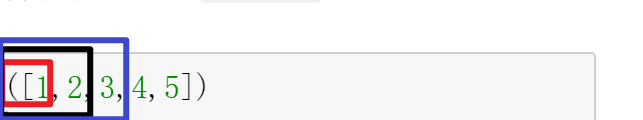

In [40]:
# 得到了滑窗对象后，能够使用相应的聚合函数进行计算
roller.mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [41]:
roller.sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

In [43]:
# 滑动相关系数或滑动协方差的计算
s2 = pd.Series([1,2,6,16,30])
roller.cov(s2), roller.corr(s2)

(0     NaN
 1     NaN
 2     2.5
 3     7.0
 4    12.0
 dtype: float64,
 0         NaN
 1         NaN
 2    0.944911
 3    0.970725
 4    0.995402
 dtype: float64)

还支持使用`apply`传入自定义函数，其传入值是对应窗口的`Series`，例如上述的均值函数可以等效表示

In [46]:
s = pd.Series([1,2,3,4,5])
# 得到滑窗对象
roller = s.rolling(window=3)
# 使用函数计算窗口均值
res = roller.mean()
# 使用自定义函数计算窗口的均值,其中x是此次传入的窗口内的值
equal_res = roller.apply(lambda x: x.mean())
print(res, equal_res)
# 上述两个方法结果等价

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64 0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64


### 类滑窗函数

**类滑窗函数的功能可以用窗口大小为`n+1`的`rolling`方法等价代替**

`shift, diff, pct_change`是一组类滑窗函数，它们的公共参数为`periods=n`，默认为1，分别表示取向前第`n`个元素的值、与向前第`n`个元素做差（与`Numpy`中不同，后者表示`n`阶差分）、与向前第`n`个元素相比计算增长率。这里的`n`可以为负，表示反方向的类似操作。

In [48]:
s = pd.Series([1,3,6,10,15])
# 取向前第2个元素的值
s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [50]:
# 与向前第2个元素做差
s.diff(2)

0    NaN
1    NaN
2    5.0
3    7.0
4    9.0
dtype: float64

In [53]:
# 与向前第1个元素相比计算增长率
s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

In [55]:
# 取向后第1个元素的值
s.shift(-1)

0     3.0
1     6.0
2    10.0
3    15.0
4     NaN
dtype: float64

**类滑窗函数的功能可以用窗口大小为`n+1`的`rolling`方法等价代替**

In [57]:
s = pd.Series([1,3,6,10,15])
roller = s.rolling(window=3)

In [58]:
s.shift(2)

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [60]:
# 实现s.shift(2)
roller.apply(lambda x: list(x)[0])# 将窗口内的值转换为列表，只取第一个元素

0    NaN
1    NaN
2    1.0
3    3.0
4    6.0
dtype: float64

In [59]:
s.diff(2)

0    NaN
1    NaN
2    5.0
3    7.0
4    9.0
dtype: float64

In [64]:
# 实现s.diff(2)
roller.apply(lambda x : list(x)[2]-list(x)[0])

0    NaN
1    NaN
2    5.0
3    7.0
4    9.0
dtype: float64

In [65]:
s.pct_change()

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

In [68]:
# 实现s.pct_change()
def my_pct(x):
    L = list(x)
    # 注意窗口大小是2
    return L[1]/L[0] - 1
s = pd.Series([1,3,6,10,15])
roller = s.rolling(window=2)
roller.apply(my_pct)

0         NaN
1    2.000000
2    1.000000
3    0.666667
4    0.500000
dtype: float64

### 扩张窗口

扩张窗口又称累计窗口，可以理解为一个动态长度的窗口，其窗口的大小就是从序列开始处到具体操作的对应位置，其使用的聚合函数会作用于这些逐步扩张的窗口上。具体地说，设序列为a1, a2, a3, a4，则其每个位置对应的窗口即\[a1\]、\[a1, a2\]、\[a1, a2, a3\]、\[a1, a2, a3, a4\]。

In [69]:
s = pd.Series([1, 3, 6, 10])
s.expanding().mean()

0    1.000000
1    2.000000
2    3.333333
3    5.000000
dtype: float64

### 指数加权窗口

1. 作为扩张窗口的`ewm`窗口

在扩张窗口中，用户可以使用各类函数进行历史的累计指标统计，但这些内置的统计函数往往把窗口中的所有元素赋予了同样的权重。事实上，可以给出不同的权重来赋给窗口中的元素，指数加权窗口就是这样一种特殊的扩张窗口。

其中，最重要的参数是`alpha`，它决定了默认情况下的窗口权重为$w_i=(1−\alpha)^i,i\in\{0,1,...,t\}$，其中$i=t$表示当前元素，$i=0$表示序列的第一个元素。

从权重公式可以看出，离开当前值越远则权重越小，若记原序列为$x$，更新后的当前元素为$y_t$，此时通过加权公式归一化后可知：

$$
\begin{split}y_t &=\frac{\sum_{i=0}^{t} w_i x_{t-i}}{\sum_{i=0}^{t} w_i} \\
&=\frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^{t} x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^{t}}\\\end{split}
$$


In [76]:
import numpy as np
np.random.seed(0)
s = pd.Series(np.random.randint(-1,2,6).cumsum())
s

0   -1
1   -1
2   -2
3   -2
4   -2
5   -1
dtype: int32

In [78]:
# 对于`Series`而言，可以用`ewm`对象如下计算指数平滑后的序列
s.ewm(alpha=0.2).mean()

0   -1.000000
1   -1.000000
2   -1.409836
3   -1.609756
4   -1.725845
5   -1.529101
dtype: float64